In [1]:
from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

In [2]:
# create instances of my beautiful classes

cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()

In [3]:
# List of text file paths to build our corpus (where we learn the transitions probs)

file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)

In [4]:
# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt

In [5]:
# compute the transition probs

probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [6]:
probability_matrix.save_all_2_chars()
probability_matrix.save_probability_table()

In [7]:
# some text to try

text = "There were better sense in the sad mechanic exercise of determining the reason of its absence where it is not. In the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love; there are at least five with whom, as it seems to me, no man of taste and spirit can help doing so."
text = "I do not believe a word of it, my dear. If he had been so very agreeable, he would have talked to Mrs. Long. But I can guess how it was"
text = "Your plan is a good one,” replied Elizabeth, “where nothing is in question but the desire of being well married; and if I were determined to get a rich husband, or any husband, I dare say I should adopt it. But these are not Jane’s feelings"
text = "she is not acting by design. As yet she cannot even be certain of the degree of her own regard, nor of its reasonableness. She has known him only a fortnight. She danced four dances with him at Meryton; she saw him one morning at his own house, and has since dined in company with him four times."

In [8]:
# encode and decode a sample text with a generated cipher

text = preprocess.lower(text)
text = preprocess.remove_unknown_chars(
    text, unknown_chars=preprocess.unknown_chars(text)
)
text = preprocess.remove_additional_spaces(text)


cipher = cipher_generator.generate_cipher()

encoded_text = text_encoder.encode_text(text, cipher)
decoded_text = text_decoder.decode_text(encoded_text, cipher)

print("Original Text:", text)
print("Encoded Text:", encoded_text)
print("Decoded Text:", decoded_text)

Original Text: she is not acting by design as yet she cannot even be certain of the degree of her own regard nor of its reasonableness she has known him only a fortnight she danced four dances with him at meryton she saw him one morning at his own house and has since dined in company with him four times
Encoded Text: gua zg wep qjpzwm iv dagzmw qg vap gua jqwwep afaw ia jarpqzw ek pua damraa ek uar ebw ramqrd wer ek zpg raqgewqihawagg gua uqg swebw uzx ewhv q kerpwzmup gua dqwjad ketr dqwjag bzpu uzx qp xarvpew gua gqb uzx ewa xerwzwm qp uzg ebw uetga qwd uqg gzwja dzwad zw jexcqwv bzpu uzx ketr pzxag
Decoded Text: she is not acting by design as yet she cannot even be certain of the degree of her own regard nor of its reasonableness she has known him only a fortnight she danced four dances with him at meryton she saw him one morning at his own house and has since dined in company with him four times


In [9]:
# break the cipher with MCMC

cipher_breaker = CipherBreaker(
    starting_cipher=cipher_generator.generate_cipher(),
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)

cipher_breaker.break_cipher(iterations=50000, print_interval=100)

Iter 0: wbd aw mtv invamf ys rdwafm iw sdv wbd nimmtv dqdm yd ndxviam tg vbd rdfxdd tg bdx tum xdfixr mtx tg avw xdiwtmiyjdmdww wbd biw lmtum bae tmjs i gtxvmafbv wbd rimndr gtcx rimndw uavb bae iv edxsvtm wbd wiu bae tmd etxmamf iv baw tum btcwd imr biw wamnd ramdr am ntepims uavb bae gtcx vaedw
Iter 100: sle is rot ahtirg pu desigr as uet sle harrot ecer pe hentair oy tle degnee oy len ofr negand ron oy its neasorapqeress sle las jrofr lim orqu a yontriglt sle darhed yown darhes fitl lim at menutor sle saf lim ore monrirg at lis ofr lowse ard las sirhe dired ir hombaru fitl lim yown times
Iter 200: the it nos acsing vd letign at des the cannos eyen ve cersain of she legree of her own regarl nor of ist reatonavjenett the hat known him onjd a forsnighs the lancel four lancet wish him as merdson the taw him one morning as hit own houte anl hat tince linel in comqand wish him four simet
Iter 300: the it nos acsing vd letign at des the cannos epen ve cersain of she legree of her own regar

['q',
 'h',
 'j',
 'd',
 'a',
 'k',
 'm',
 'u',
 'z',
 'y',
 'l',
 'x',
 'i',
 'w',
 'e',
 'c',
 's',
 'r',
 'p',
 'g',
 't',
 'f',
 'b',
 'n',
 'v',
 'o']

In [21]:
cipher_breaker.max_log_lik

['wbd aw mtv invamf ys rdwafm iw sdv wbd nimmtv dqdm yd ndxviam tg vbd rdfxdd tg bdx tum xdfixr mtx tg avw xdiwtmiyjdmdww wbd biw lmtum bae tmjs i gtxvmafbv wbd rimndr gtcx rimndw uavb bae iv edxsvtm wbd wiu bae tmd etxmamf iv baw tum btcwd imr biw wamnd ramdr am ntepims uavb bae gtcx vaedw',
 'wbd aw mtv invamf yu rdwafm iw udv wbd nimmtv dqdm yd ndxviam tg vbd rdfxdd tg bdx tsm xdfixr mtx tg avw xdiwtmiyjdmdww wbd biw lmtsm bae tmju i gtxvmafbv wbd rimndr gtcx rimndw savb bae iv edxuvtm wbd wis bae tmd etxmamf iv baw tsm btcwd imr biw wamnd ramdr am ntepimu savb bae gtcx vaedw',
 'wbd aw mtv invamf yu rdwafm iw udv wbd nimmtv dqdm yd ndoviam tg vbd rdfodd tg bdo tsm odfior mto tg avw odiwtmiyjdmdww wbd biw lmtsm bae tmju i gtovmafbv wbd rimndr gtco rimndw savb bae iv edouvtm wbd wis bae tmd etomamf iv baw tsm btcwd imr biw wamnd ramdr am ntepimu savb bae gtco vaedw',
 'wbd aw mtv invamf yu edwafm iw udv wbd nimmtv dqdm yd ndoviam tg vbd edfodd tg bdo tsm odfioe mto tg avw odiwtmiyjdm

In [19]:
from src.CipherUtils import TextLik
a = TextLik()

a.get_log_likelihood(text, cipher_breaker.probability_table)


-1470.0113773727176

MovieWriter imagemagick unavailable; using Pillow instead.


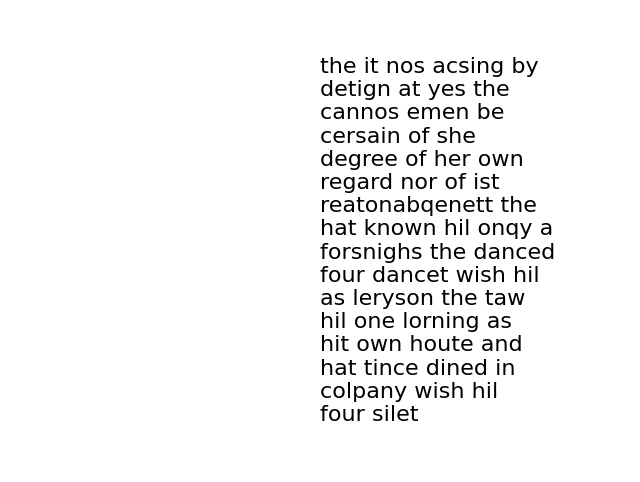

In [11]:
cipher_breaker.generate_animation(filename="she is not.gif")